In [1]:
import numpy as np
import pandas as pd
import json

In [2]:
import pyrfume

In [3]:
def combine_lists_for_duplicates(df):
    combined_df = pd.DataFrame(columns=df.columns)  # Initialize an empty DataFrame with the same columns

    for index, group in df.groupby(df.index):
        if len(group) > 1:  # If duplicate index
            combined_lists = sum(group['Descriptors'], [])  # Combine lists
            combined_df = combined_df.append(pd.DataFrame({'Descriptors': [combined_lists]}, index=[index]))  # Append to combined DataFrame
        else:
            combined_df = combined_df.append(group)  # If not a duplicate, just append the row

    return combined_df

In [4]:
import ast

csv_arc = pyrfume.load_data('prediction_targets/arctander_1960.csv')
csv_arc['Descriptors'] = csv_arc['Descriptors'].apply(ast.literal_eval)
csv_arc = combine_lists_for_duplicates(csv_arc)
csv_keller = pyrfume.load_data('prediction_targets/keller_2016.csv')

/var/folders/zp/1226jyvd1ws1q507lfnb8kmm0000gn/T/ipykernel_78569/2906102532.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(group)  # If not a duplicate, just append the row
/var/folders/zp/1226jyvd1ws1q507lfnb8kmm0000gn/T/ipykernel_78569/2906102532.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(group)  # If not a duplicate, just append the row
/var/folders/zp/1226jyvd1ws1q507lfnb8kmm0000gn/T/ipykernel_78569/2906102532.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(group)  # If not a duplicate, just append the row
/var/folders/zp/1226jyvd1ws1q507lfnb8kmm0000gn/T/ipykernel_78569/2906102532.py:9: FutureWarning: The

In [5]:
csv_keller

,Descriptor,Ave Rating
CID,,
126,Acid,3.916667
126,Ammonia,2.297619
126,Bakery,0.607143
126,Burnt,1.421687
126,Chemical,12.523810
...,...,...
16220109,Spices,5.734694
16220109,Sweaty,1.020408
16220109,Sweet,8.602041


In [6]:
keller = csv_keller.pivot(columns='Descriptor', values='Ave Rating')
keller

Descriptor,Acid,Ammonia,Bakery,Burnt,Chemical,Cold,Decayed,Familiarity,Fish,Flower,...,Grass,Intensity,Musky,Pleasantness,Sour,Spices,Sweaty,Sweet,Warm,Wood
CID,,,,,,,,,,,,,,,,,,,,,
126,3.916667,2.297619,0.607143,1.421687,12.523810,3.317647,4.250000,39.314607,0.301205,6.807229,...,1.481928,45.786517,5.119048,50.303371,5.321429,3.506024,1.421687,15.232558,2.941176,0.795181
176,2.470588,4.676471,2.171429,3.200000,10.055556,4.176471,4.176471,39.395833,2.235294,7.114286,...,3.594595,17.500000,7.297297,47.104167,15.805556,7.942857,8.216216,5.324324,7.027778,3.885714
177,3.852459,2.524590,5.540984,1.419355,9.781250,4.396825,3.580645,39.135135,0.833333,3.754098,...,2.766667,32.391892,5.883333,48.878378,9.396825,1.793651,2.233333,14.375000,2.938462,0.790323
180,3.327586,4.406780,2.105263,3.362069,8.885246,8.033333,3.950000,39.750000,2.844828,6.982759,...,6.508475,33.823529,7.672414,54.132353,5.534483,3.438596,0.568966,9.305085,7.050847,8.913793
196,5.696429,1.833333,1.581818,3.018519,8.719298,4.105263,4.963636,39.428571,0.425926,3.851852,...,2.285714,26.396825,8.636364,46.587302,9.236364,7.703704,4.388889,10.877193,7.803571,1.796296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6114390,2.500000,6.959184,7.780000,4.212121,6.464646,2.734694,0.777778,62.240385,0.959184,11.843137,...,1.857143,61.576923,6.448980,57.865385,2.622449,12.438776,1.877551,18.529412,9.444444,2.897959
6429333,2.400000,3.750000,2.000000,0.585366,7.113636,1.795455,1.325581,32.232143,1.075000,3.121951,...,3.904762,19.910714,12.047619,44.446429,15.309524,3.954545,3.325000,7.170732,2.279070,2.292683
6999977,1.338028,1.013889,6.242857,3.169014,9.084507,1.385714,4.971429,46.418919,0.157143,3.619718,...,1.500000,47.486486,4.154930,49.702703,8.929577,3.300000,3.549296,12.800000,4.309859,3.085714


In [7]:
# keller['compound'] = [pcp.Compound.from_cid(cid) for cid in keller.index]
# compounds = {int(c['cid']): c for c in [c.to_dict() for c in keller['compound']]}
# with open('compounds.json', 'w') as file:
#     json.dump(compounds, file)


# combined_cids = [int(i) for i in np.sort(np.append(keller.index, csv_arc.index))]
# combined_compounds_list = []
# CHUNK = 100
# combined_compounds_chunk = []
# for i, cid in enumerate(combined_cids):
#     combined_compounds_chunk.append(pcp.Compound.from_cid(cid))
#     if not (i % 100):
#         print(i)
#         combined_compounds_list.extend(combined_compounds_chunk)
#         combined_compounds_chunk = []

# combined_compounds_list.extend(combined_compounds_chunk)
# combined_compounds_chunk = []

# combined_compounds_list = [pcp.Compound.from_cid(cid) for cid in combined_cids]
# compounds = {int(c['cid']): c for c in [c.to_dict() for c in combined_compounds_list]}
# with open('compounds.json', 'w') as file:
#     json.dump(compounds, file)

with open('compounds.json', 'r') as file:
    string_compounds = json.load(file)
    compounds = {int(k): v for k, v in string_compounds.items()}
    del string_compounds

In [8]:
keller_mol = pd.DataFrame(index=keller.index)
keller_mol['SMILES'] = [compounds[cid]['isomeric_smiles'] for cid in keller_mol.index]

In [9]:
keller

Descriptor,Acid,Ammonia,Bakery,Burnt,Chemical,Cold,Decayed,Familiarity,Fish,Flower,...,Grass,Intensity,Musky,Pleasantness,Sour,Spices,Sweaty,Sweet,Warm,Wood
CID,,,,,,,,,,,,,,,,,,,,,
126,3.916667,2.297619,0.607143,1.421687,12.523810,3.317647,4.250000,39.314607,0.301205,6.807229,...,1.481928,45.786517,5.119048,50.303371,5.321429,3.506024,1.421687,15.232558,2.941176,0.795181
176,2.470588,4.676471,2.171429,3.200000,10.055556,4.176471,4.176471,39.395833,2.235294,7.114286,...,3.594595,17.500000,7.297297,47.104167,15.805556,7.942857,8.216216,5.324324,7.027778,3.885714
177,3.852459,2.524590,5.540984,1.419355,9.781250,4.396825,3.580645,39.135135,0.833333,3.754098,...,2.766667,32.391892,5.883333,48.878378,9.396825,1.793651,2.233333,14.375000,2.938462,0.790323
180,3.327586,4.406780,2.105263,3.362069,8.885246,8.033333,3.950000,39.750000,2.844828,6.982759,...,6.508475,33.823529,7.672414,54.132353,5.534483,3.438596,0.568966,9.305085,7.050847,8.913793
196,5.696429,1.833333,1.581818,3.018519,8.719298,4.105263,4.963636,39.428571,0.425926,3.851852,...,2.285714,26.396825,8.636364,46.587302,9.236364,7.703704,4.388889,10.877193,7.803571,1.796296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6114390,2.500000,6.959184,7.780000,4.212121,6.464646,2.734694,0.777778,62.240385,0.959184,11.843137,...,1.857143,61.576923,6.448980,57.865385,2.622449,12.438776,1.877551,18.529412,9.444444,2.897959
6429333,2.400000,3.750000,2.000000,0.585366,7.113636,1.795455,1.325581,32.232143,1.075000,3.121951,...,3.904762,19.910714,12.047619,44.446429,15.309524,3.954545,3.325000,7.170732,2.279070,2.292683
6999977,1.338028,1.013889,6.242857,3.169014,9.084507,1.385714,4.971429,46.418919,0.157143,3.619718,...,1.500000,47.486486,4.154930,49.702703,8.929577,3.300000,3.549296,12.800000,4.309859,3.085714


In [10]:
(keller > 10).mean()

Descriptor
Acid            0.037500
Ammonia         0.016667
Bakery          0.031250
Burnt           0.041667
Chemical        0.518750
Cold            0.004167
Decayed         0.031250
Familiarity     1.000000
Fish            0.002083
Flower          0.062500
Fruit           0.089583
Garlic          0.020833
Grass           0.012500
Intensity       1.000000
Musky           0.147917
Pleasantness    1.000000
Sour            0.141667
Spices          0.056250
Sweaty          0.025000
Sweet           0.406250
Warm            0.008333
Wood            0.004167
dtype: float64

In [11]:
keller_mol

,SMILES
CID,
126,C1=CC(=CC=C1C=O)O
176,CC(=O)O
177,CC=O
180,CC(=O)C
196,C(CCC(=O)O)CC(=O)O
...,...
6114390,C/C=C/C1=CC(=C(C=C1)OC(=O)CC2=CC=CC=C2)OC
6429333,C/C=C(/C=O)\C1=CC=CC=C1
6999977,CCCCOC(=O)[C@H](C)O


In [12]:
from rdkit import Chem
from mordred import Calculator, descriptors

calc = Calculator(descriptors)

In [112]:
keller_des = calc.pandas(Chem.MolFromSmiles(smi) for smi in keller_mol['SMILES'])

480it [00:06, 72.02it/s] 


In [113]:
# keller_des = keller_des.fill_missing().astype(float).dropna(axis=1)
keller_des = keller_des.fill_missing().dropna(axis=1, how='all')

In [114]:
missing_half = (keller_des.fill_missing().dropna(axis=1, how='all').isna().sum().sort_values() > 240)
missing_half_indices = missing_half[missing_half].index

In [115]:
keller_des = keller_des.drop(columns=missing_half_indices)
keller_des

,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,VE2_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0,0,11.189957,2.193993,4.387987,11.189957,1.243329,3.089765,2.856388,0.317376,...,8.590258,37.289972,122.036779,8.135785,90,9,40.0,43.0,3.472222,2.166667
1,1,0,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,1.931852,0.482963,...,6.188264,24.179697,60.021129,7.502641,9,0,12.0,9.0,3.111111,1.000000
2,0,0,2.828427,1.414214,2.828427,2.828427,0.942809,1.849457,1.707107,0.569036,...,4.174387,17.310771,44.026215,6.289459,4,0,6.0,4.0,2.25,1.000000
3,0,0,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,1.931852,0.482963,...,6.188264,24.179697,58.041865,5.804186,9,0,12.0,9.0,3.111111,1.000000
4,2,0,10.987918,2.0,4.0,10.987918,1.098792,3.123214,3.023716,0.302372,...,7.933438,36.894490,146.057909,7.302895,151,7,38.0,36.0,5.222222,2.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,0,26.84169,2.33208,4.66416,26.84169,1.278176,3.941769,3.875216,0.184534,...,9.635281,54.051163,282.125594,7.233990,1042,28,100.0,112.0,6.805556,4.944444
476,0,0,13.936238,2.236068,4.472136,13.936238,1.266931,3.279067,3.065248,0.278659,...,8.816260,40.266743,146.073165,6.955865,158,13,48.0,53.0,3.972222,2.777778
477,0,0,11.239561,2.088622,4.177243,11.239561,1.123956,3.124079,2.80272,0.280272,...,8.168770,37.326413,146.094294,6.087262,143,9,38.0,38.0,5.222222,2.527778
478,0,0,20.927,2.612121,5.185192,20.927,1.231,3.815315,3.7925,0.223088,...,10.380312,65.490671,236.214016,5.249200,420,34,102.0,128.0,6.409722,3.416667


In [116]:
keller_des_median = keller_des.fillna(keller_des.median())
keller_des_zero = keller_des.fillna(0)

In [126]:
keller_des_using = keller_des_median

In [127]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [128]:
def normalize_column(col):
    return (col - col.mean()) / col.std()
# Apply the normalization function to each column
norm_keller_des = keller_des_using.apply(normalize_column, axis=0).dropna(axis=1)
norm_keller_des

,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,VE2_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,-0.301653,-0.205923,-0.258795,0.365861,0.436773,-0.258795,0.570078,-0.095612,-0.118042,0.171900,...,0.329473,-0.286732,-0.528969,0.195904,-0.056791,-0.175683,-0.187486,-0.128800,-0.655776,-0.445108
1,2.238585,-0.205923,-1.918009,-1.709673,-1.696052,-1.918009,-2.995895,-2.354262,-2.219878,2.336856,...,-1.884758,-1.806232,-1.764569,0.098887,-0.056792,-1.638014,-1.655905,-1.616423,-0.910648,-1.836493
2,-0.301653,-0.205923,-2.054528,-3.137735,-3.163531,-2.054528,-2.270196,-3.168337,-2.730812,3.462210,...,-3.741211,-2.602351,-2.083252,-0.087010,-0.056792,-1.638014,-1.970566,-1.835192,-1.518421,-1.836493
3,-0.301653,-0.205923,-1.918009,-1.709673,-1.696052,-1.918009,-2.995895,-2.354262,-2.219878,2.336856,...,-1.884758,-1.806232,-1.804004,-0.161369,-0.056792,-1.638014,-1.655905,-1.616423,-0.910648,-1.836493
4,4.778822,-0.205923,-0.302185,-0.505762,-0.458909,-0.302185,-0.795969,-0.012746,0.262361,-0.024280,...,-0.276003,-0.332569,-0.050372,0.068279,-0.056791,-0.500645,-0.292373,-0.435075,0.579375,-0.146955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,-0.301653,-0.205923,3.102591,0.986293,1.074329,3.102591,0.899426,2.015130,2.198156,-1.564943,...,1.292808,1.655916,2.660642,0.057721,-0.056786,2.911461,2.959126,2.890201,1.696893,2.867711
476,-0.301653,-0.205923,0.331000,0.554906,0.631035,0.331000,0.793147,0.373361,0.356779,-0.334311,...,0.537809,0.058281,-0.050068,0.015104,-0.056791,0.474242,0.232063,0.308737,-0.302875,0.283712
477,-0.301653,-0.205923,-0.248142,-0.107580,-0.049737,-0.248142,-0.558137,-0.010603,-0.240051,-0.313221,...,-0.059067,-0.282508,-0.049647,-0.117993,-0.056791,-0.175683,-0.292373,-0.347568,0.579375,-0.014442
478,-0.301653,-0.205923,1.832345,2.244535,2.277153,1.832345,0.453558,1.701856,2.010110,-1.060868,...,1.979599,2.981772,1.745899,-0.246409,-0.056789,3.886348,3.064013,3.590259,1.417513,1.045660


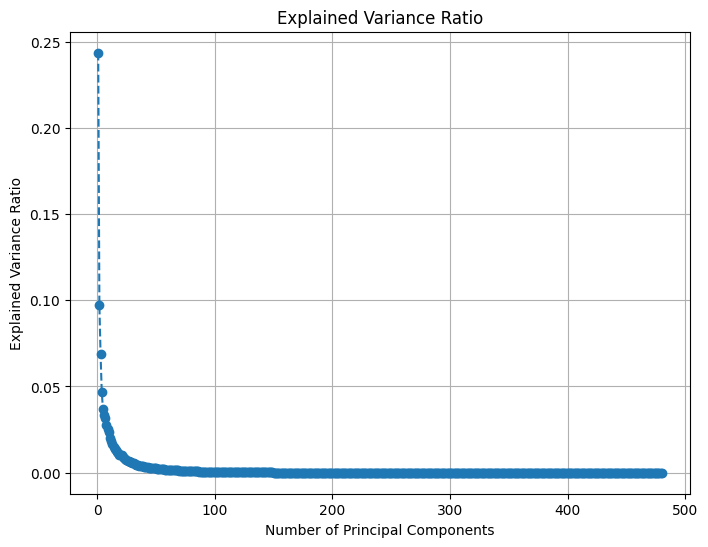

In [129]:
# Instantiate PCA
pca = PCA()

# Fit PCA to the data
pca.fit(norm_keller_des)

df_pca = pca.transform(norm_keller_des)

# Convert the transformed data back to a DataFrame
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])

# Visualize explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()


In [130]:
pca.explained_variance_ratio_

array([2.43529282e-01, 9.70879878e-02, 6.87785187e-02, 4.70116445e-02,
       3.71322961e-02, 3.33844319e-02, 3.14485935e-02, 2.79526479e-02,
       2.55602345e-02, 2.36259529e-02, 1.98450657e-02, 1.86053708e-02,
       1.64296558e-02, 1.50050082e-02, 1.39484945e-02, 1.29478829e-02,
       1.19403192e-02, 1.12733283e-02, 1.05345336e-02, 1.01713457e-02,
       1.01566768e-02, 9.01672071e-03, 8.47116953e-03, 7.82788722e-03,
       7.60578256e-03, 6.89595004e-03, 6.60882852e-03, 6.44794627e-03,
       6.13920583e-03, 5.59047604e-03, 5.52210897e-03, 5.05488128e-03,
       4.74123848e-03, 4.42147297e-03, 4.23957405e-03, 4.11558035e-03,
       3.97966692e-03, 3.81832787e-03, 3.61005592e-03, 3.53540304e-03,
       3.49105624e-03, 3.36980474e-03, 3.19121377e-03, 3.00547434e-03,
       2.89854201e-03, 2.75185238e-03, 2.64281800e-03, 2.59566658e-03,
       2.55671008e-03, 2.45046026e-03, 2.42208482e-03, 2.30473466e-03,
       2.25094794e-03, 2.21280235e-03, 2.03074102e-03, 1.96616652e-03,
      

In [131]:
# Calculate cumulative sum
cumulative_sum = np.cumsum(pca.explained_variance_ratio_)

# Find the index where cumulative sum crosses 0.9, 0.95, and 0.99
index_90 = np.argmax(cumulative_sum >= 0.9)
index_95 = np.argmax(cumulative_sum >= 0.95)
index_99 = np.argmax(cumulative_sum >= 0.99)
index_999 = np.argmax(cumulative_sum >= 0.999)

# Output the number of entries required to reach each threshold
print(f"Entries to reach cumsum of 0.9: {index_90 + 1}")
print(f"Entries to reach cumsum of 0.95: {index_95 + 1}")
print(f"Entries to reach cumsum of 0.99: {index_99 + 1}")
print(f"Entries to reach cumsum of 0.999: {index_999 + 1}")

Entries to reach cumsum of 0.9: 42
Entries to reach cumsum of 0.95: 64
Entries to reach cumsum of 0.99: 125
Entries to reach cumsum of 0.999: 221


In [132]:
# Get the absolute loadings for each principal component
loadings_abs = pd.DataFrame(abs(pca.components_), columns=norm_keller_des.columns)

significant_columns = loadings_abs.idxmax(axis=1).drop_duplicates()
significant_columns

0      nHeavyAtom
1         AATS1dv
2      ETA_dPsi_A
3       ETA_eta_B
4           ATS0Z
          ...    
470          MIC5
475         VE3_A
476     BCUTse-1l
477       AATSC8p
479        ATS4dv
Length: 267, dtype: object

In [133]:
def calc_corrs(df, cols):
    all_corrs = []
    for i, col in enumerate(cols):
        print(i)
        all_corrs.append([])
        for ccol in cols:
            all_corrs[-1].extend([df[col].corr(df[ccol])])

    return np.array(all_corrs)

# top_des = df.columns
all_corrs = calc_corrs(norm_keller_des, significant_columns)
reduced_corrs = calc_corrs(norm_keller_des, significant_columns[:index_99])

corrs_df = pd.DataFrame(all_corrs)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
1

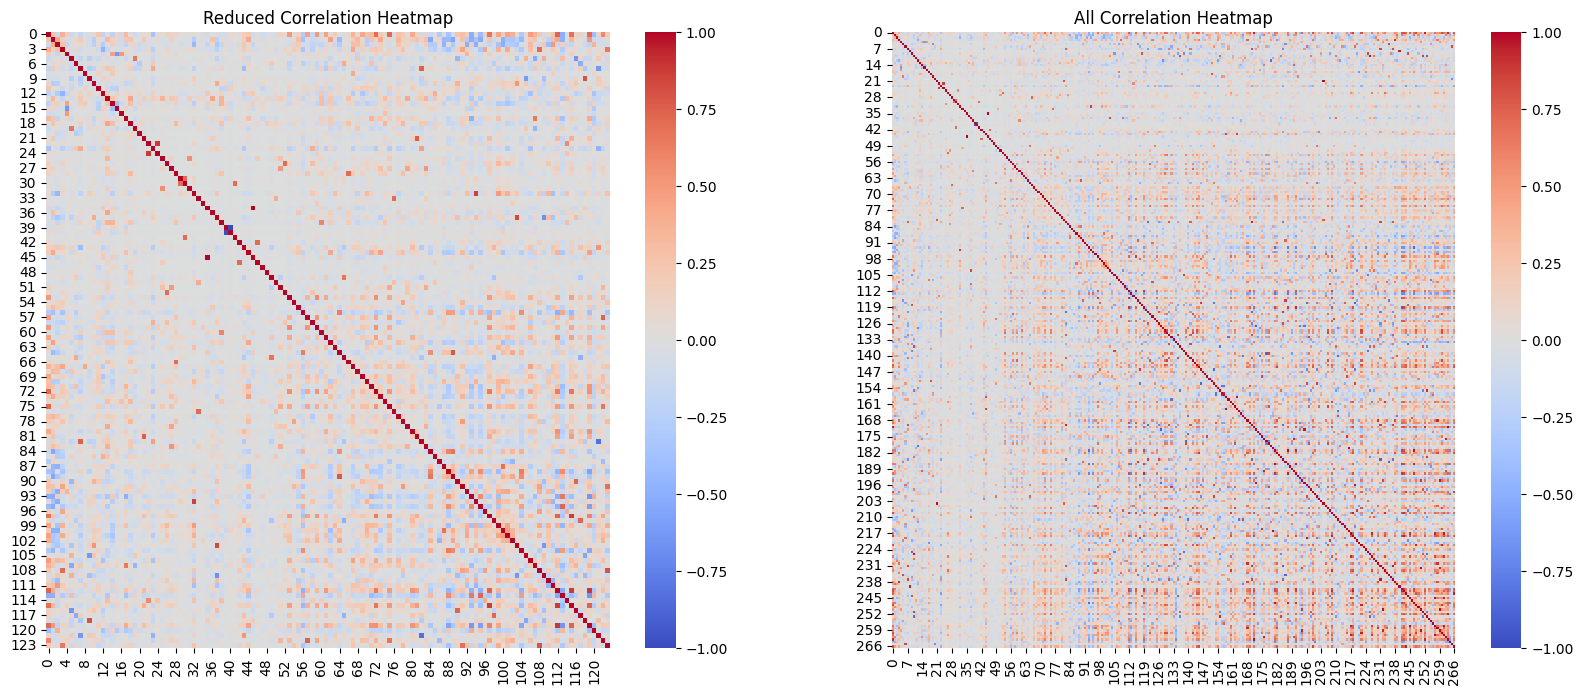

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(reduced_corrs, cmap='coolwarm', ax=axs[0], vmin=-1, vmax=1)
sns.heatmap(all_corrs, cmap='coolwarm', ax=axs[1], vmin=-1, vmax=1)
axs[1].set_title('All Correlation Heatmap')
axs[0].set_title('Reduced Correlation Heatmap')
plt.show()

In [135]:
print(np.mean(reduced_corrs[reduced_corrs < 1]))
print(np.median(reduced_corrs[reduced_corrs < 1]))

0.012761585267264544
-0.0029555158504736383


In [136]:
keller_reset = keller.reset_index(drop=True)

keller_sign = keller_des_using[significant_columns]
keller_sign_reset = keller_sign.reset_index(drop=True)

dataset = pd.concat([keller_reset, keller_sign_reset], axis=1)
dataset.index = keller.index

# dataset.to_csv('keller_dataset.csv')
dataset

,Acid,Ammonia,Bakery,Burnt,Chemical,Cold,Decayed,Familiarity,Fish,Flower,...,Xp-4dv,Xpc-6d,ZMIC3,ATS8d,Xp-5dv,MIC5,VE3_A,BCUTse-1l,AATSC8p,ATS4dv
CID,,,,,,,,,,,,,,,,,,,,,
126,3.916667,2.297619,0.607143,1.421687,12.523810,3.317647,4.250000,39.314607,0.301205,6.807229,...,0.552889,1.171098,16.669400,0.0,0.347572,31.808080,0.944197,2.438727,0.009795,68.0
176,2.470588,4.676471,2.171429,3.200000,10.055556,4.176471,4.176471,39.395833,2.235294,7.114286,...,0.000000,0.000000,12.466917,0.0,0.000000,21.920384,-0.257812,2.606279,0.009795,0.0
177,3.852459,2.524590,5.540984,1.419355,9.781250,4.396825,3.580645,39.135135,0.833333,3.754098,...,0.000000,0.000000,9.993712,0.0,0.000000,16.982783,-0.669173,2.612995,0.009795,0.0
180,3.327586,4.406780,2.105263,3.362069,8.885246,8.033333,3.950000,39.750000,2.844828,6.982759,...,0.000000,0.000000,12.876403,0.0,0.000000,15.328173,-0.257812,2.569487,0.009795,0.0
196,5.696429,1.833333,1.581818,3.018519,8.719298,4.105263,4.963636,39.428571,0.425926,3.851852,...,0.552451,0.288675,26.968582,4.0,0.276365,23.870461,1.106486,2.559300,0.063238,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6114390,2.500000,6.959184,7.780000,4.212121,6.464646,2.734694,0.777778,62.240385,0.959184,11.843137,...,1.985868,4.748426,21.839087,144.0,1.242057,37.965983,2.096539,2.432828,-0.007958,334.0
6429333,2.400000,3.750000,2.000000,0.585366,7.113636,1.795455,1.325581,32.232143,1.075000,3.121951,...,0.933352,1.893994,17.465678,3.0,0.494626,30.348360,1.215439,2.431447,0.234407,96.0
6999977,1.338028,1.013889,6.242857,3.169014,9.084507,1.385714,4.971429,46.418919,0.157143,3.619718,...,0.437700,0.603553,17.033208,21.0,0.228576,27.275978,1.030590,2.576733,-0.013685,44.0


In [137]:
label_cols = dataset.columns[:22]
label_cols

Index(['Acid', 'Ammonia', 'Bakery', 'Burnt', 'Chemical', 'Cold', 'Decayed',
       'Familiarity', 'Fish', 'Flower', 'Fruit', 'Garlic', 'Grass',
       'Intensity', 'Musky', 'Pleasantness', 'Sour', 'Spices', 'Sweaty',
       'Sweet', 'Warm', 'Wood'],
      dtype='object')

In [138]:
set(csv_arc['Descriptors'].explode().tolist())

{'acid',
 'aldehidic',
 'aldehydic',
 'almond',
 'almondy',
 'ambre',
 'animal',
 'anisic',
 'apple',
 'apricot',
 'aromatic',
 'aromatique',
 'balsamic',
 'banana',
 'basalmic',
 'berry',
 'brandy',
 'buttery',
 'camphor',
 'camphoraceous',
 'caramelic',
 'citrus',
 'citrusy',
 'coco',
 'coconut',
 'creamy',
 'earthy',
 'ehtereal',
 'ethereal',
 'fatty',
 'floral',
 'foral',
 'fruit',
 'fruity',
 'gas',
 'gassy',
 'geranium',
 'grape',
 'green',
 'green,',
 'hay',
 'herbaceous',
 'herbal',
 'honey',
 'hyacinth',
 'jasmin',
 'leafy',
 'leather',
 'leathery',
 'lilac',
 'lillac',
 'lily',
 'medicinal',
 'metallic',
 'mimosa',
 'mint',
 'minty',
 'mossy',
 'mushroom',
 'mushroomy',
 'musk',
 'musky',
 'must',
 'musty',
 'narcissus',
 'nut',
 'nutty',
 'oily',
 'orange',
 'orange-blossom',
 'orris',
 'peach',
 'peachy',
 'pear',
 'pepper',
 'peppery',
 'phenolic',
 'pine',
 'pineapple',
 'piney',
 'plum',
 'powdery',
 'root',
 'rooty',
 'rose',
 'rosy',
 'sandalwood',
 'smoky',
 'sour',
 

In [139]:
# ['Acid', 'Ammonia', 'Bakery', 'Burnt', 'Chemical', 'Cold', 'Decayed', 'Familiarity', 'Fish', 'Flower', 'Fruit', 'Garlic', 'Grass', 'Intensity', 'Musky', 'Pleasantness', 'Sour', 'Spices', 'Sweaty', 'Sweet', 'Warm', 'Wood']
# ['acid', 'aldehidic', 'aldehydic', 'almond', 'almondy', 'ambre', 'animal', 'anisic', 'apple', 'apricot', 'aromatic', 'aromatique', 'balsamic', 'banana', 'basalmic', 'berry', 'brandy', 'buttery', 'camphor', 'camphoraceous', 'caramelic', 'citrus', 'citrusy', 'coco', 'coconut', 'creamy', 'earthy', 'ehtereal', 'ethereal', 'fatty', 'floral', 'foral', 'fruit', 'fruity', 'gas', 'gassy', 'geranium', 'grape', 'green', 'green,', 'hay', 'herbaceous', 'herbal', 'honey', 'hyacinth', 'jasmin', 'leafy', 'leather', 'leathery', 'lilac', 'lillac', 'lily', 'medicinal', 'metallic', 'mimosa', 'mint', 'minty', 'mossy', 'mushroom', 'mushroomy', 'musk', 'musky', 'must', 'musty', 'narcissus', 'nut', 'nutty', 'oily', 'orange', 'orange-blossom', 'orris', 'peach', 'peachy', 'pear', 'pepper', 'peppery', 'phenolic', 'pine', 'pineapple', 'piney', 'plum', 'powdery', 'root', 'rooty', 'rose', 'rosy', 'sandalwood', 'smoky', 'sour', 'spicy', 'sulfuraceous', 'tarry', 'tea', 'tobacco', 'vanilla', 'vanillin', 'vanlilin', 'violet', 'waxy', 'winey', 'woney', 'wood', 'woody']

In [140]:
keller_cols = ['Acid', 'Ammonia', 'Bakery', 'Burnt', 'Chemical', 'Cold', 'Decayed', 'Fish', 'Flower', 'Fruit', 'Garlic', 'Grass', 'Musky', 'Sour', 'Spices', 'Sweaty', 'Sweet', 'Warm', 'Wood']
arc_cols = ['acid', 'aldehidic', 'aldehydic', 'almond', 'almondy', 'ambre', 'animal', 'anisic', 'apple', 'apricot', 'aromatic', 'aromatique', 'balsamic', 'banana', 'basalmic', 'berry', 'brandy', 'buttery', 'camphor', 'camphoraceous', 'caramelic', 'citrus', 'citrusy', 'coco', 'coconut', 'creamy', 'earthy', 'ehtereal', 'ethereal', 'fatty', 'floral', 'foral', 'fruit', 'fruity', 'gas', 'gassy', 'geranium', 'grape', 'green', 'greenhay', 'hay', 'herbaceous', 'herbal', 'honey', 'hyacinth', 'jasmin', 'leafy', 'leather', 'leathery', 'lilac', 'lillac', 'lily', 'medicinal', 'metallic', 'mimosa', 'mint', 'minty', 'mossy', 'mushroom', 'mushroomy', 'musk', 'musky', 'must', 'musty', 'narcissus', 'nut', 'nutty', 'oily', 'orange', 'orangeblossom', 'orris', 'peach', 'peachy', 'pear', 'pepper', 'peppery', 'phenolic', 'pine', 'pineapple', 'piney', 'plum', 'powdery', 'root', 'rooty', 'rose', 'rosy', 'sandalwood', 'smoky', 'sour', 'spicy', 'sulfuraceous', 'tarry', 'tea', 'tobacco', 'vanilla', 'vanillin', 'vanlilin', 'violet', 'waxy', 'winey', 'woney', 'wood', 'woody']

In [141]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [142]:
keller_toks = nlp(' '.join(keller_cols).lower())
arc_toks = nlp(' '.join(arc_cols).lower())

In [143]:
similarities = {col: [] for col in keller_cols}
for tarc in arc_toks:
    sims = np.array([tarc.similarity(tkeller) for tkeller in keller_toks])
    if sims.max() > 0:
        max_sim = sims.argmax()
        print(tarc.text, keller_cols[max_sim], sims[max_sim])
        similarities[keller_cols[max_sim]].append((tarc.text, sims[max_sim]))

acid Acid 1.0
almond Fruit 0.5985593199729919
animal Fish 0.5099308490753174
apple Fruit 0.6735885739326477
apricot Fruit 0.6545909643173218
aromatic Spices 0.6323654651641846
balsamic Garlic 0.6394084692001343
banana Fruit 0.6650428175926208
berry Fruit 0.7161108255386353
brandy Spices 0.5090364813804626
buttery Spices 0.6120394468307495
camphor Spices 0.4903112053871155
citrus Fruit 0.7326241135597229
citrusy Fruit 0.6325305104255676
coco Fruit 0.5445670485496521
coconut Spices 0.6486926078796387
creamy Sweet 0.6829500198364258
earthy Sweet 0.6040592789649963
ethereal Sweet 0.41340088844299316
fatty Acid 0.372873991727829
floral Flower 0.732086181640625
foral Flower 0.35310524702072144
fruit Fruit 1.0
fruity Fruit 0.7661333680152893
gas Ammonia 0.5118460059165955
gassy Musky 0.4504317343235016
geranium Flower 0.6184329986572266
grape Fruit 0.6930158734321594
green Flower 0.5513177514076233
hay Grass 0.5541138648986816
herbaceous Flower 0.624347984790802
herbal Spices 0.60919970273971

/var/folders/zp/1226jyvd1ws1q507lfnb8kmm0000gn/T/ipykernel_78569/3301956124.py:3: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  sims = np.array([tarc.similarity(tkeller) for tkeller in keller_toks])


In [144]:
similarities

{'Acid': [('acid', 1.0), ('fatty', 0.372873991727829)],
 'Ammonia': [('gas', 0.5118460059165955), ('phenolic', 0.5988628268241882)],
 'Bakery': [('orris', 0.05210107937455177)],
 'Burnt': [],
 'Chemical': [('medicinal', 0.6153272986412048),
  ('must', 0.22023995220661163)],
 'Cold': [],
 'Decayed': [],
 'Fish': [('animal', 0.5099308490753174)],
 'Flower': [('floral', 0.732086181640625),
  ('foral', 0.35310524702072144),
  ('geranium', 0.6184329986572266),
  ('green', 0.5513177514076233),
  ('herbaceous', 0.624347984790802),
  ('hyacinth', 0.5569320917129517),
  ('lilac', 0.6082397103309631),
  ('lily', 0.5856360197067261),
  ('narcissus', 0.31950318813323975),
  ('rose', 0.44660621881484985),
  ('violet', 0.47357824444770813)],
 'Fruit': [('almond', 0.5985593199729919),
  ('apple', 0.6735885739326477),
  ('apricot', 0.6545909643173218),
  ('banana', 0.6650428175926208),
  ('berry', 0.7161108255386353),
  ('citrus', 0.7326241135597229),
  ('citrusy', 0.6325305104255676),
  ('coco', 0.54

In [145]:
similarities['Wood'].remove(('leathery', 0.6023793816566467))

In [146]:
col_matches = {k: [tupl[0] for tupl in v] for k, v in similarities.items()}
col_matches

{'Acid': ['acid', 'fatty'],
 'Ammonia': ['gas', 'phenolic'],
 'Bakery': ['orris'],
 'Burnt': [],
 'Chemical': ['medicinal', 'must'],
 'Cold': [],
 'Decayed': [],
 'Fish': ['animal'],
 'Flower': ['floral',
  'foral',
  'geranium',
  'green',
  'herbaceous',
  'hyacinth',
  'lilac',
  'lily',
  'narcissus',
  'rose',
  'violet'],
 'Fruit': ['almond',
  'apple',
  'apricot',
  'banana',
  'berry',
  'citrus',
  'citrusy',
  'coco',
  'fruit',
  'fruity',
  'grape',
  'mimosa',
  'nut',
  'orange',
  'peach',
  'pear',
  'pineapple',
  'plum',
  'powdery',
  'winey'],
 'Garlic': ['balsamic', 'mushroom', 'mushroomy', 'pepper', 'peppery'],
 'Grass': ['hay', 'leafy', 'mossy', 'root', 'rooty'],
 'Musky': ['gassy', 'musk', 'musky', 'musty', 'piney', 'tarry', 'waxy'],
 'Sour': ['sour'],
 'Spices': ['aromatic',
  'brandy',
  'buttery',
  'camphor',
  'coconut',
  'herbal',
  'mint',
  'tea',
  'tobacco',
  'vanilla',
  'vanillin'],
 'Sweaty': ['oily'],
 'Sweet': ['creamy',
  'earthy',
  'ethereal

In [147]:
inverted_col_matches = {}
for key, values in col_matches.items():
    for value in values:
        inverted_col_matches[value] = key

inverted_col_matches

{'acid': 'Acid',
 'fatty': 'Acid',
 'gas': 'Ammonia',
 'phenolic': 'Ammonia',
 'orris': 'Bakery',
 'medicinal': 'Chemical',
 'must': 'Chemical',
 'animal': 'Fish',
 'floral': 'Flower',
 'foral': 'Flower',
 'geranium': 'Flower',
 'green': 'Flower',
 'herbaceous': 'Flower',
 'hyacinth': 'Flower',
 'lilac': 'Flower',
 'lily': 'Flower',
 'narcissus': 'Flower',
 'rose': 'Flower',
 'violet': 'Flower',
 'almond': 'Fruit',
 'apple': 'Fruit',
 'apricot': 'Fruit',
 'banana': 'Fruit',
 'berry': 'Fruit',
 'citrus': 'Fruit',
 'citrusy': 'Fruit',
 'coco': 'Fruit',
 'fruit': 'Fruit',
 'fruity': 'Fruit',
 'grape': 'Fruit',
 'mimosa': 'Fruit',
 'nut': 'Fruit',
 'orange': 'Fruit',
 'peach': 'Fruit',
 'pear': 'Fruit',
 'pineapple': 'Fruit',
 'plum': 'Fruit',
 'powdery': 'Fruit',
 'winey': 'Fruit',
 'balsamic': 'Garlic',
 'mushroom': 'Garlic',
 'mushroomy': 'Garlic',
 'pepper': 'Garlic',
 'peppery': 'Garlic',
 'hay': 'Grass',
 'leafy': 'Grass',
 'mossy': 'Grass',
 'root': 'Grass',
 'rooty': 'Grass',
 'gas

In [148]:
arc = pd.DataFrame(columns=list(col_matches.keys()), index=csv_arc.index).fillna(0)
for index, row in csv_arc.iterrows():
    for d in row['Descriptors']:
        if d in inverted_col_matches:
            arc.loc[index, inverted_col_matches[d]] = 1
arc

,Acid,Ammonia,Bakery,Burnt,Chemical,Cold,Decayed,Fish,Flower,Fruit,Garlic,Grass,Musky,Sour,Spices,Sweaty,Sweet,Warm,Wood
107,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
126,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
174,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
176,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
177,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143411647,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
143963103,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
144116082,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
145793235,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0


In [149]:
arc = arc.loc[(arc != 0).any(axis=1)]
arc

,Acid,Ammonia,Bakery,Burnt,Chemical,Cold,Decayed,Fish,Flower,Fruit,Garlic,Grass,Musky,Sour,Spices,Sweaty,Sweet,Warm,Wood
107,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
126,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
174,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
176,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
177,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143411647,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
143963103,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
144116082,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
145793235,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0


In [150]:
common_cols = ['Chemical', 'Cold', 'Flower', 'Fruit', 'Garlic', 'Grass', 'Musky', 'Spices', 'Sweet', 'Wood']

In [151]:
arc[common_cols].mean()

Chemical    0.022249
Cold        0.000000
Flower      0.627427
Fruit       0.425566
Garlic      0.109223
Grass       0.063107
Musky       0.146036
Spices      0.120146
Sweet       0.299353
Wood        0.166667
dtype: float64

In [299]:
# csv_arc['Descriptors'].apply(len).mean()
arc[common_cols].mean().mean()

0.16953978159126365

In [304]:
keller_bin = (keller[common_cols] > 8.95).astype(int)
keller_bin.mean().mean()

0.16916666666666666

In [375]:
combined_bin = keller_bin.combine_first(arc[common_cols])
combined_bin = combined_bin.loc[(combined_bin != 0).any(axis=1)]

In [376]:
combined_bin

,Chemical,Cold,Flower,Fruit,Garlic,Grass,Musky,Spices,Sweet,Wood
CID,,,,,,,,,,
107,0,0,0,0,1,0,0,1,0,0
126,1,0,0,0,0,0,0,0,1,0
176,1,0,0,0,0,0,0,0,0,0
177,1,0,0,0,0,0,0,0,1,0
179,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
143411647,0,0,1,0,0,0,0,0,0,0
143963103,0,0,0,0,0,0,1,0,0,0
144116082,0,0,1,0,0,1,0,0,0,1


In [377]:
combined_bin.mean()

Chemical    0.137863
Cold        0.035742
Flower      0.498822
Fruit       0.352710
Garlic      0.104870
Grass       0.251767
Musky       0.111155
Spices      0.065593
Sweet       0.147290
Wood        0.148861
dtype: float64

In [378]:
combined_bin_mol = pd.DataFrame(index=combined_bin.index)
combined_bin_mol['SMILES'] = [compounds[cid]['isomeric_smiles'] for cid in combined_bin_mol.index]

combined_bin_des = calc.pandas(Chem.MolFromSmiles(smi) for smi in combined_bin_mol['SMILES'])
combined_bin_des = combined_bin_des.fill_missing().astype(float).dropna(axis=1)

combined_bin_reset = combined_bin.reset_index(drop=True)

combined_bin_sign = combined_bin_des[significant_columns]
combined_bin_sign_reset = combined_bin_sign.reset_index(drop=True)

dataset = pd.concat([combined_bin_reset, combined_bin_sign_reset], axis=1)
dataset.index = combined_bin.index

dataset.to_csv('arc_keller_bin_dataset.csv')
dataset

2210it [00:37, 15.11it/s]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


2242it [00:38, 30.08it/s]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


2546it [00:44, 57.82it/s]


,Chemical,Cold,Flower,Fruit,Garlic,Grass,Musky,Spices,Sweet,Wood,...,nAtom,ATS1Z,ATS1d,nBridgehead,nAromBond,nH,ATS1v,ATS0dv,VMcGowan,Sare
CID,,,,,,,,,,,,,,,,,,,,,
107,0,0,0,0,1,0,0,1,0,0,...,21.0,482.0,69.0,0.0,6.0,10.0,5531.754298,146.0,121.35,20.60
126,1,0,0,0,0,0,0,0,1,0,...,15.0,386.0,54.0,0.0,6.0,6.0,4225.774029,138.0,93.17,15.08
176,1,0,0,0,0,0,0,0,0,0,...,8.0,158.0,13.0,0.0,0.0,4.0,1455.199386,78.0,46.48,8.32
177,1,0,0,0,0,0,0,0,1,0,...,7.0,108.0,9.0,0.0,0.0,4.0,1185.192869,46.0,40.61,6.92
179,0,0,0,0,0,0,0,0,1,0,...,14.0,254.0,31.0,0.0,0.0,8.0,2761.179655,88.0,74.66,13.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143411647,0,0,1,0,0,0,0,0,0,0,...,26.0,492.0,69.0,0.0,6.0,14.0,6144.211149,128.0,150.22,24.72
143963103,0,0,0,0,0,0,1,0,0,0,...,35.0,672.0,110.0,0.0,6.0,20.0,8526.698454,150.0,185.93,33.00
144116082,0,0,1,0,0,1,0,0,0,1,...,38.0,660.0,116.0,0.0,0.0,24.0,8562.128018,110.0,184.74,35.52


{'acid',
 'aldehidic',
 'aldehydic',
 'almond',
 'almondy',
 'ambre',
 'animal',
 'anisic',
 'apple',
 'apricot',
 'aromatic',
 'aromatique',
 'balsamic',
 'banana',
 'basalmic',
 'berry',
 'brandy',
 'buttery',
 'camphor',
 'camphoraceous',
 'caramelic',
 'citrus',
 'citrusy',
 'coco',
 'coconut',
 'creamy',
 'earthy',
 'ehtereal',
 'ethereal',
 'fatty',
 'floral',
 'foral',
 'fruit',
 'fruity',
 'gas',
 'gassy',
 'geranium',
 'grape',
 'green',
 'green,',
 'hay',
 'herbaceous',
 'herbal',
 'honey',
 'hyacinth',
 'jasmin',
 'leafy',
 'leather',
 'leathery',
 'lilac',
 'lillac',
 'lily',
 'medicinal',
 'metallic',
 'mimosa',
 'mint',
 'minty',
 'mossy',
 'mushroom',
 'mushroomy',
 'musk',
 'musky',
 'must',
 'musty',
 'narcissus',
 'nut',
 'nutty',
 'oily',
 'orange',
 'orange-blossom',
 'orris',
 'peach',
 'peachy',
 'pear',
 'pepper',
 'peppery',
 'phenolic',
 'pine',
 'pineapple',
 'piney',
 'plum',
 'powdery',
 'root',
 'rooty',
 'rose',
 'rosy',
 'sandalwood',
 'smoky',
 'sour',
 

In [152]:
arc_exp_cols = [c.capitalize() for c in set(csv_arc['Descriptors'].explode().tolist())]
arc_exp_cols

['Anisic',
 'Aldehydic',
 'Camphor',
 'Camphoraceous',
 'Medicinal',
 'Winey',
 'Ethereal',
 'Tobacco',
 'Green',
 'Rooty',
 'Tea',
 'Lily',
 'Fruity',
 'Minty',
 'Rosy',
 'Animal',
 'Pepper',
 'Mushroomy',
 'Mint',
 'Ehtereal',
 'Citrusy',
 'Musk',
 'Musky',
 'Orange-blossom',
 'Nut',
 'Violet',
 'Basalmic',
 'Aromatic',
 'Aldehidic',
 'Smoky',
 'Mushroom',
 'Phenolic',
 'Metallic',
 'Mimosa',
 'Sour',
 'Earthy',
 'Oily',
 'Balsamic',
 'Waxy',
 'Apple',
 'Leathery',
 'Plum',
 'Lilac',
 'Leather',
 'Hyacinth',
 'Creamy',
 'Orange',
 'Vanillin',
 'Grape',
 'Sulfuraceous',
 'Sandalwood',
 'Fruit',
 'Citrus',
 'Banana',
 'Lillac',
 'Caramelic',
 'Ambre',
 'Floral',
 'Fatty',
 'Piney',
 'Herbaceous',
 'Green,',
 'Leafy',
 'Pineapple',
 'Powdery',
 'Coconut',
 'Geranium',
 'Mossy',
 'Jasmin',
 'Brandy',
 'Musty',
 'Apricot',
 'Peach',
 'Tarry',
 'Hay',
 'Gassy',
 'Wood',
 'Buttery',
 'Herbal',
 'Nutty',
 'Peachy',
 'Pine',
 'Almond',
 'Orris',
 'Coco',
 'Vanilla',
 'Woody',
 'Berry',
 'Arom

In [209]:
smell_groups = {
    "Floral": ["Floral", "Foral", "Rose", "Lilac", "Violet", "Narcissus", "Lily", "Mimosa", "Geranium", "Rosy", "Hyacinth", "Jasmin", "Orange-blossom", "Lillac", "Orris"],
    "Fruity": ["Fruity", "Fruit", "Banana", "Peachy", "Apricot", "Apple", "Orange", "Berry", "Grape", "Pineapple", "Peach", "Pear", "Plum", "Coco", "Brandy", "Almondy", "Woney", "Citrus", "Citrusy"],
    "Herbal": ["Mint", "Hay", "Tea", "Herbal", "Herbaceous", "Minty", "Anisic"],
    "Green": ["Green", "Green,", "Mossy", "Leafy",],
    "Woody": ["Sandalwood", "Woody", "Wood", "Pine", "Piney", "Ambre", "Smoky"],
    "Sweet": ["Honey", "Caramelic", "Buttery", "Creamy", "Vanilla", "Vanillin", "Vanlilin", "Coconut", "Winey"],
    "Balsamic": ["Balsamic", "Basalmic"],
    "Earth": ["Earthy", "Musty", "Must", "Rooty", "Root", "Mushroom", "Mushroomy"],
    "Spicy": ["Pepper", "Peppery", "Spicy", "Aldehidic"],
    "Chemical": ["Acid", "Gas", "Gassy", "Aldehydic", "Metallic", "Phenolic", "Sulfuraceous", "Medicinal"],
    "Animalic": ["Animal", "Musk", "Musky", "Leathery", "Leather"],
    "Nutty": ["Nut", "Almond", "Nutty"],
    "Other": ["Aromatique", "Aromatic", "Camphoraceous", "Ethereal", "Ehtereal", "Waxy", "Camphor", "Oily", "Tarry", "Sour", "Powdery", "Fatty", "Tobacco"]
}

l = []
for e in [v for k, v in smell_groups.items()]:
    for ee in e:
        if ee in l:
            print(ee)
    l.extend(e)
print(len(l), len(set(l)))
# print(set(l) - set(arc_exp_cols))
# print(set(arc_exp_cols) - set(l))

inverted_smell_groups = {}
for key, values in smell_groups.items():
    for value in values:
        inverted_smell_groups[value] = key

inverted_smell_groups

103 103


{'Floral': 'Floral',
 'Foral': 'Floral',
 'Rose': 'Floral',
 'Lilac': 'Floral',
 'Violet': 'Floral',
 'Narcissus': 'Floral',
 'Lily': 'Floral',
 'Mimosa': 'Floral',
 'Geranium': 'Floral',
 'Rosy': 'Floral',
 'Hyacinth': 'Floral',
 'Jasmin': 'Floral',
 'Orange-blossom': 'Floral',
 'Lillac': 'Floral',
 'Orris': 'Floral',
 'Fruity': 'Fruity',
 'Fruit': 'Fruity',
 'Banana': 'Fruity',
 'Peachy': 'Fruity',
 'Apricot': 'Fruity',
 'Apple': 'Fruity',
 'Orange': 'Fruity',
 'Berry': 'Fruity',
 'Grape': 'Fruity',
 'Pineapple': 'Fruity',
 'Peach': 'Fruity',
 'Pear': 'Fruity',
 'Plum': 'Fruity',
 'Coco': 'Fruity',
 'Brandy': 'Fruity',
 'Almondy': 'Fruity',
 'Woney': 'Fruity',
 'Citrus': 'Fruity',
 'Citrusy': 'Fruity',
 'Mint': 'Herbal',
 'Hay': 'Herbal',
 'Tea': 'Herbal',
 'Herbal': 'Herbal',
 'Herbaceous': 'Herbal',
 'Minty': 'Herbal',
 'Anisic': 'Herbal',
 'Green': 'Green',
 'Green,': 'Green',
 'Mossy': 'Green',
 'Leafy': 'Green',
 'Sandalwood': 'Woody',
 'Woody': 'Woody',
 'Wood': 'Woody',
 'Pine

In [210]:

arc_exp = pd.DataFrame(columns=list(smell_groups.keys()), index=csv_arc.index).fillna(0)
for index, row in csv_arc.iterrows():
    for d in row['Descriptors']:
        D = d.capitalize()
        if D in inverted_smell_groups:
            arc_exp.loc[index, inverted_smell_groups[D]] = 1
print(arc_exp.mean())
arc_exp

Floral      0.386890
Fruity      0.368106
Herbal      0.258593
Green       0.254197
Woody       0.177858
Sweet       0.151878
Balsamic    0.095524
Earth       0.087530
Spicy       0.083133
Chemical    0.080336
Animalic    0.067546
Nutty       0.035971
Other       0.350120
dtype: float64


,Floral,Fruity,Herbal,Green,Woody,Sweet,Balsamic,Earth,Spicy,Chemical,Animalic,Nutty,Other
107,0,0,0,0,0,1,1,0,0,0,0,0,0
126,0,0,0,0,1,0,1,0,0,0,0,0,0
174,0,0,0,0,0,0,0,1,0,0,0,0,0
176,0,0,0,0,0,0,0,0,0,0,0,0,1
177,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143411647,0,0,1,0,0,0,0,0,1,0,0,0,0
143963103,0,0,0,0,0,0,0,0,0,0,1,0,0
144116082,1,0,0,1,1,0,0,0,0,0,0,0,0
145793235,1,1,0,0,0,0,0,0,0,0,0,0,1


In [211]:
arc_red = arc_exp.drop(columns=['Other'])
arc_red = arc_red.loc[(arc_red != 0).any(axis=1)]
print(arc_red.mean())
print(arc_red.mean().mean())
arc_red

Floral      0.404682
Fruity      0.385033
Herbal      0.270485
Green       0.265886
Woody       0.186037
Sweet       0.158863
Balsamic    0.099916
Earth       0.091555
Spicy       0.086957
Chemical    0.084030
Animalic    0.070652
Nutty       0.037625
dtype: float64
0.17847686733556298


,Floral,Fruity,Herbal,Green,Woody,Sweet,Balsamic,Earth,Spicy,Chemical,Animalic,Nutty
107,0,0,0,0,0,1,1,0,0,0,0,0
126,0,0,0,0,1,0,1,0,0,0,0,0
174,0,0,0,0,0,0,0,1,0,0,0,0
177,0,0,0,0,0,1,0,0,0,0,0,0
179,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
143411647,0,0,1,0,0,0,0,0,1,0,0,0
143963103,0,0,0,0,0,0,0,0,0,0,1,0
144116082,1,0,0,1,1,0,0,0,0,0,0,0
145793235,1,1,0,0,0,0,0,0,0,0,0,0


In [212]:
arc_mol = pd.DataFrame(index=arc_red.index)
arc_mol['SMILES'] = [compounds[cid]['isomeric_smiles'] for cid in arc_mol.index]

arc_des = calc.pandas(Chem.MolFromSmiles(smi) for smi in arc_mol['SMILES'])
# arc_des = arc_des.fill_missing().astype(float).dropna(axis=1)

2041it [00:42, 12.11it/s]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


2081it [00:42, 30.51it/s]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


2260it [00:47, 34.68it/s]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


2392it [00:49, 47.95it/s]


In [213]:
arc_des = arc_des.fill_missing().dropna(axis=1, how='all')
arc_missing_half = (arc_des.fill_missing().dropna(axis=1, how='all').isna().sum().sort_values() > len(arc_des) / 2)
arc_missing_half_indices = arc_missing_half[arc_missing_half].index
arc_des = arc_des.drop(columns=arc_missing_half_indices)
arc_des

,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,VE2_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,1,0,13.674401,2.166455,4.332909,13.674401,1.243127,3.277938,3.074108,0.279464,...,8.594710,39.846691,150.068080,7.146099,174,10,48.0,50.0,3.972222,2.583333
1,0,0,11.189957,2.193993,4.387987,11.189957,1.243329,3.089765,2.856388,0.317376,...,8.590258,37.289972,122.036779,8.135785,90,9,40.0,43.0,3.472222,2.166667
2,0,0,4.472136,1.618034,3.236068,4.472136,1.118034,2.155909,1.946498,0.486624,...,5.509388,22.328143,62.036779,6.203678,10,1,10.0,8.0,2.5,1.250000
3,0,0,2.828427,1.414214,2.828427,2.828427,0.942809,1.849457,1.707107,0.569036,...,4.174387,17.310771,44.026215,6.289459,4,0,6.0,4.0,2.25,1.000000
4,0,0,6.0,2.0,4.0,6.0,1.0,2.610845,2.309401,0.3849,...,7.626083,30.698690,88.052429,6.289459,29,4,22.0,21.0,4.222222,1.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.703341,40.921066,162.104465,6.234787,2000000126,11,46.0,49.0,5.722222,3.500000
2388,0,0,17.630886,2.396837,4.793673,17.630886,1.175392,3.598521,3.457299,0.230487,...,9.543306,46.855405,204.151415,5.832898,344,23,72.0,83.0,7.416667,3.444444
2389,0,0,16.748093,2.382487,4.764974,16.748093,1.196292,3.534378,3.348152,0.239154,...,9.525808,45.675927,196.182715,5.162703,306,21,68.0,78.0,6.645833,3.194444
2390,0,0,17.095849,2.094267,4.188533,17.095849,1.139723,3.536308,3.562634,0.237509,...,8.577159,44.498104,208.182715,5.338018,478,14,60.0,60.0,7.083333,3.666667


In [214]:
arc_des_median = arc_des.fillna(arc_des.median())
arc_des_zero = arc_des.fillna(0)

In [227]:
arc_des_using = arc_des_median
norm_arc_des = arc_des_using.apply(normalize_column, axis=0).dropna(axis=1)

In [228]:
norm_arc_des

,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,VE2_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,4.433579,-0.054164,-0.419462,-0.193045,-0.126077,-0.419462,0.540619,-0.404848,-0.331955,0.452539,...,-0.191800,-0.564507,-0.572190,0.889935,-0.127025,-0.530476,-0.412523,-0.412290,-0.776009,-0.609184
1,-0.177343,-0.054164,-0.890247,-0.031608,0.049694,-0.890247,0.543548,-1.021689,-0.921254,1.204634,...,-0.197616,-0.859817,-1.039483,1.780400,-0.127025,-0.650626,-0.747214,-0.648724,-1.057603,-1.035876
2,-0.177343,-0.054164,-2.163227,-3.407974,-3.626461,-2.163227,-1.280076,-4.082925,-3.384029,4.562161,...,-4.223169,-2.587962,-2.039705,0.041996,-0.127025,-1.611821,-2.002307,-1.830891,-1.605148,-1.974598
3,-0.177343,-0.054164,-2.474699,-4.602802,-4.927378,-2.474699,-3.830420,-5.087491,-4.031983,6.197025,...,-5.967519,-3.167487,-2.339948,0.119178,-0.127025,-1.731971,-2.169653,-1.965996,-1.745946,-2.230613
4,-0.177343,-0.054164,-1.873708,-1.168828,-1.188500,-1.873708,-2.998023,-2.591616,-2.401768,2.544164,...,-1.457435,-1.621134,-1.606015,0.119178,-0.127025,-1.251373,-1.500270,-1.391800,-0.635211,-1.775475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,-0.177343,-0.054164,-0.041488,0.033587,0.049694,-0.041488,0.089983,0.126240,0.020049,-0.126228,...,-0.049859,-0.440412,-0.371539,0.069987,1.526098,-0.410327,-0.496196,-0.446066,0.209572,0.329539
2388,-0.177343,-0.054164,0.330265,1.157493,1.344375,0.330265,-0.445242,0.646040,0.705216,-0.519078,...,1.047664,0.245025,0.329399,-0.291612,-0.127025,1.031467,0.591552,0.702325,1.163865,0.272646
2389,-0.177343,-0.054164,0.162982,1.073371,1.252785,0.162982,-0.141050,0.435776,0.409791,-0.347141,...,1.024800,0.108791,0.196558,-0.894616,-0.127025,0.791168,0.424206,0.533444,0.729740,0.016631
2390,-0.177343,-0.054164,0.228879,-0.616222,-0.586828,0.228879,-0.964395,0.442103,0.990325,-0.379769,...,-0.214732,-0.027252,0.396602,-0.736877,-0.127025,-0.049878,0.089515,-0.074528,0.976135,0.500216


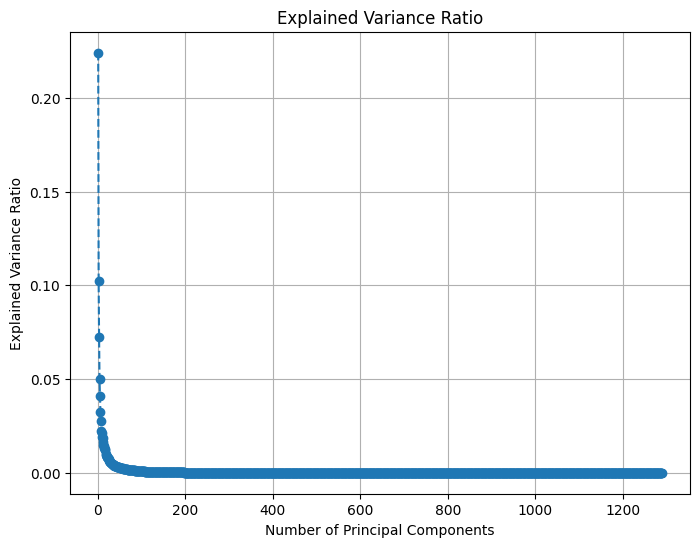

In [229]:
# Instantiate PCA
pca = PCA()

# Fit PCA to the data
pca.fit(norm_arc_des)

df_pca = pca.transform(norm_arc_des)

# Convert the transformed data back to a DataFrame
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])

# Visualize explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()


In [230]:
# Calculate cumulative sum
cumulative_sum = np.cumsum(pca.explained_variance_ratio_)

# Find the index where cumulative sum crosses 0.9, 0.95, and 0.99
index_90 = np.argmax(cumulative_sum >= 0.9)
index_95 = np.argmax(cumulative_sum >= 0.95)
index_99 = np.argmax(cumulative_sum >= 0.99)
index_999 = np.argmax(cumulative_sum >= 0.999)

# Output the number of entries required to reach each threshold
print(f"Entries to reach cumsum of 0.9: {index_90 + 1}")
print(f"Entries to reach cumsum of 0.95: {index_95 + 1}")
print(f"Entries to reach cumsum of 0.99: {index_99 + 1}")
print(f"Entries to reach cumsum of 0.999: {index_999 + 1}")

Entries to reach cumsum of 0.9: 57
Entries to reach cumsum of 0.95: 89
Entries to reach cumsum of 0.99: 176
Entries to reach cumsum of 0.999: 316


In [231]:
# Get the absolute loadings for each principal component
loadings_abs = pd.DataFrame(abs(pca.components_), columns=norm_arc_des.columns)

significant_columns = loadings_abs.idxmax(axis=1).drop_duplicates()
significant_columns

0        nHeavyAtom
1           AATS1dv
2           AATSC1d
3       ETA_shape_p
4           ATSC5dv
           ...     
1276       n8FHRing
1277         n4Ring
1278        n3HRing
1279       n8FARing
1281      n11AHRing
Length: 680, dtype: object

In [187]:
# Get the absolute loadings for each principal component
loadings_abs = pd.DataFrame(abs(pca.components_), columns=norm_arc_des.columns)

significant_columns = loadings_abs.idxmax(axis=1).drop_duplicates()
significant_columns

# top_des = df.columns
all_corrs = calc_corrs(norm_arc_des, significant_columns)
reduced_corrs = calc_corrs(norm_arc_des, significant_columns[:index_99])

corrs_df = pd.DataFrame(all_corrs)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

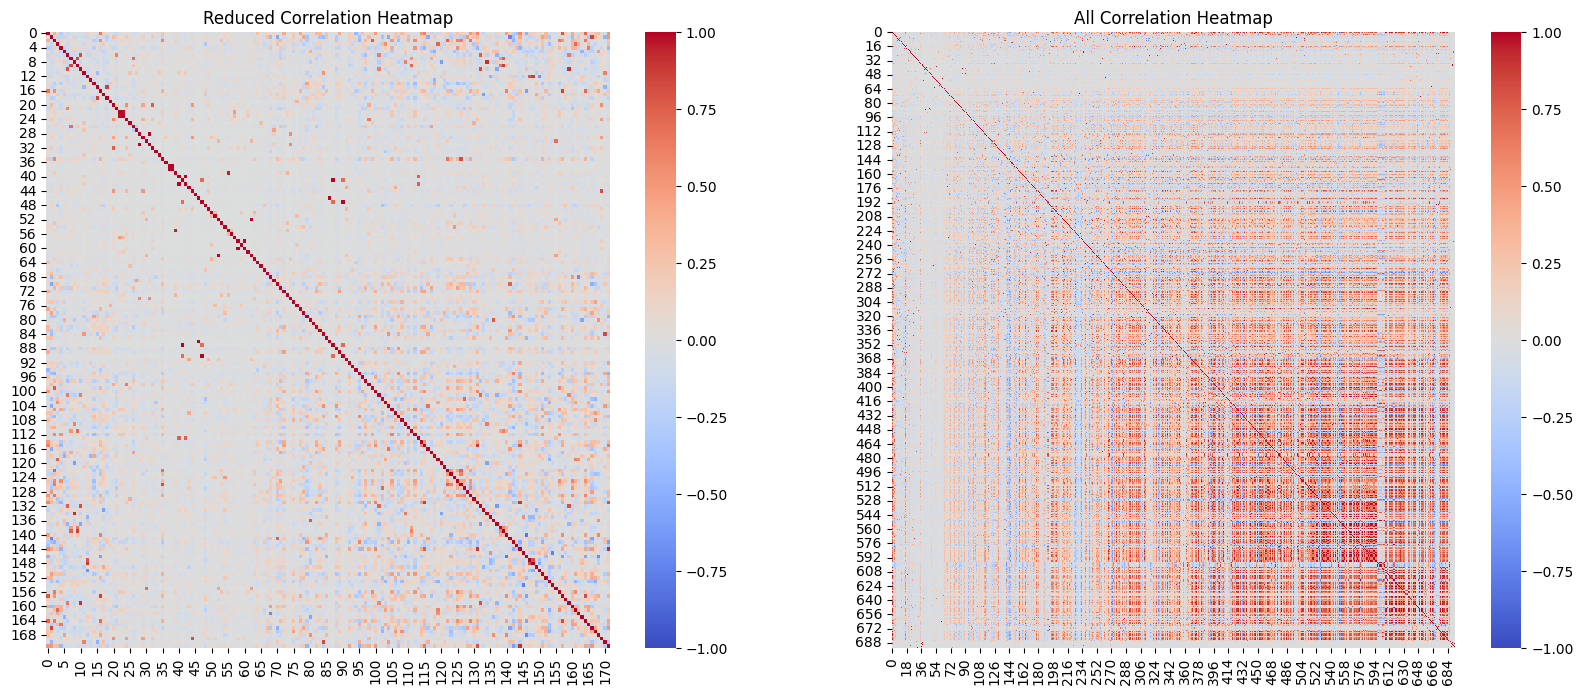

0.0094701407994269
-0.0032597459403047578


In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(reduced_corrs, cmap='coolwarm', ax=axs[0], vmin=-1, vmax=1)
sns.heatmap(all_corrs, cmap='coolwarm', ax=axs[1], vmin=-1, vmax=1)
axs[1].set_title('All Correlation Heatmap')
axs[0].set_title('Reduced Correlation Heatmap')
plt.show()


print(np.mean(reduced_corrs[reduced_corrs < 1]))
print(np.median(reduced_corrs[reduced_corrs < 1]))

In [235]:
arc_reset = arc_red.reset_index(drop=True)

# dataset = pd.concat([arc_reset, arc_des_using[significant_columns]], axis=1)
dataset = pd.concat([arc_reset, arc_des_using], axis=1)
dataset.index = arc_red.index

# IGNORE 2 EXTREMELY LARGE ATOMS
dataset = dataset.drop(index=[62074, 16129878])
dataset.to_csv('data/arc_median.csv')
dataset

,Floral,Fruity,Herbal,Green,Woody,Sweet,Balsamic,Earth,Spicy,Chemical,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
107,0,0,0,0,0,1,1,0,0,0,...,8.594710,39.846691,150.068080,7.146099,174,10,48.0,50.0,3.972222,2.583333
126,0,0,0,0,1,0,1,0,0,0,...,8.590258,37.289972,122.036779,8.135785,90,9,40.0,43.0,3.472222,2.166667
174,0,0,0,0,0,0,0,1,0,0,...,5.509388,22.328143,62.036779,6.203678,10,1,10.0,8.0,2.500000,1.250000
177,0,0,0,0,0,1,0,0,0,0,...,4.174387,17.310771,44.026215,6.289459,4,0,6.0,4.0,2.250000,1.000000
179,0,0,0,0,0,1,0,0,0,0,...,7.626083,30.698690,88.052429,6.289459,29,4,22.0,21.0,4.222222,1.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143411647,0,0,1,0,0,0,0,0,1,0,...,8.703341,40.921066,162.104465,6.234787,2000000126,11,46.0,49.0,5.722222,3.500000
143963103,0,0,0,0,0,0,0,0,0,0,...,9.543306,46.855405,204.151415,5.832898,344,23,72.0,83.0,7.416667,3.444444
144116082,1,0,0,1,1,0,0,0,0,0,...,9.525808,45.675927,196.182715,5.162703,306,21,68.0,78.0,6.645833,3.194444
145793235,1,1,0,0,0,0,0,0,0,0,...,8.577159,44.498104,208.182715,5.338018,478,14,60.0,60.0,7.083333,3.666667


In [233]:
arc_red.mean()

Floral      0.404682
Fruity      0.385033
Herbal      0.270485
Green       0.265886
Woody       0.186037
Sweet       0.158863
Balsamic    0.099916
Earth       0.091555
Spicy       0.086957
Chemical    0.084030
Animalic    0.070652
Nutty       0.037625
dtype: float64